In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/fire.csv')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   CLASS      17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [ ]:

df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [ ]:

df.value_counts("CLASS")

,count
CLASS,
0,8759
1,8683


In [ ]:
df['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [ ]:
df.isnull().sum()

,0
SIZE,0
FUEL,0
DISTANCE,0
DESIBEL,0
AIRFLOW,0
FREQUENCY,0
CLASS,0


In [ ]:
df.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [ ]:
df.columns

Index(['SIZE', 'FUEL', 'DISTANCE', 'DESIBEL', 'AIRFLOW', 'FREQUENCY', 'CLASS'], dtype='object')

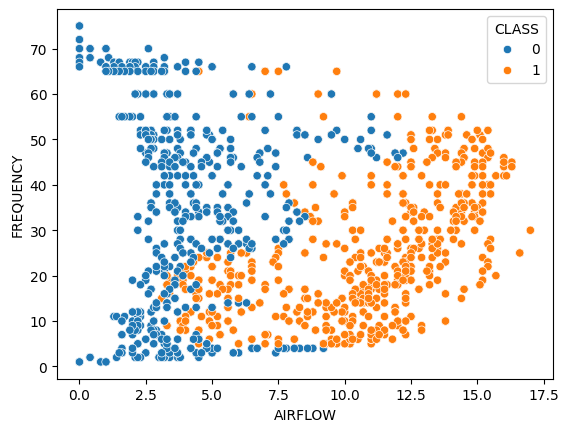

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="AIRFLOW", y="FREQUENCY", hue="CLASS")
plt.show()

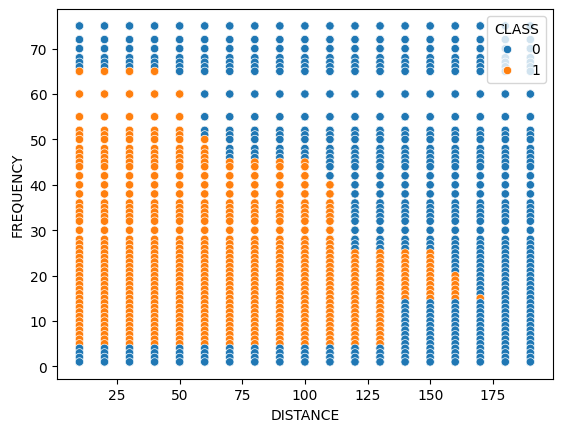

In [ ]:
sns.scatterplot(df,x='DISTANCE',y='FREQUENCY',hue='CLASS')
plt.show()

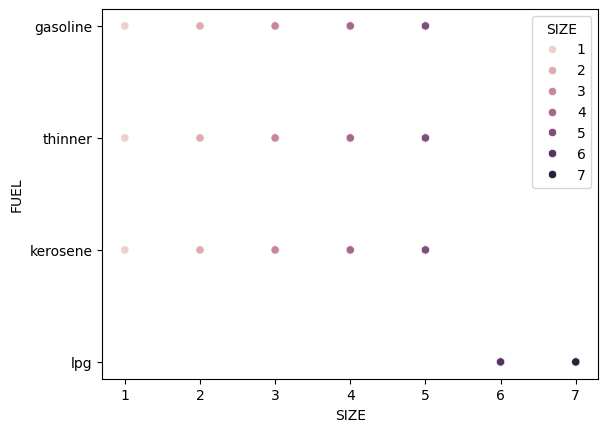

In [ ]:
sns.scatterplot(df,x='SIZE',y='FUEL',hue='SIZE')
plt.show()

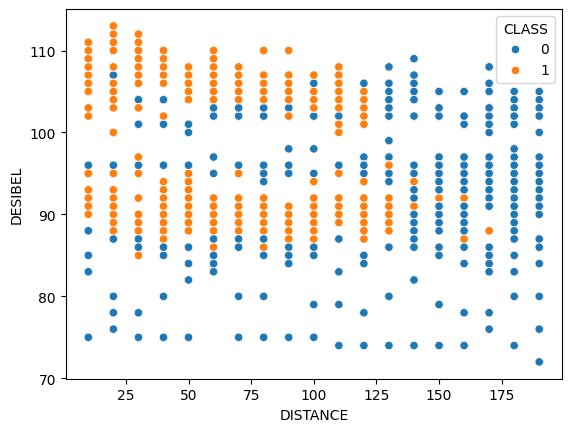

In [ ]:
sns.scatterplot(df,x='DISTANCE',y='DESIBEL',hue='CLASS')
plt.show()

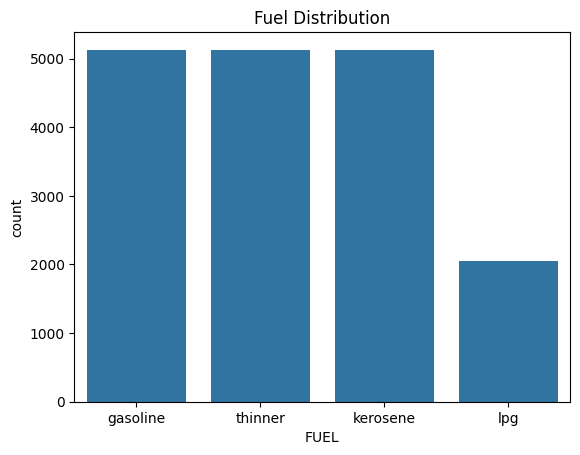

In [ ]:
sns.countplot(x=df['FUEL'])
plt.title("Fuel Distribution")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2=df.copy()

In [ ]:
dummies = pd.get_dummies(df2.FUEL).astype(int)
dummies

,gasoline,kerosene,lpg,thinner
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17437,0,0,1,0
17438,0,0,1,0
17439,0,0,1,0
17440,0,0,1,0


In [ ]:
df2 = pd.concat([df,dummies],axis='columns')
df2
df2 = df2.drop(['FUEL'], axis='columns')
df2

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS,gasoline,kerosene,lpg,thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


In [ ]:
df2

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,CLASS,gasoline,kerosene,lpg,thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


In [ ]:
X=df2.drop(['CLASS','thinner'],axis=1)
Y=df2[['CLASS']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
x_train

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,gasoline,kerosene,lpg
3993,4,170,83,2.0,3,1,0,0
12163,2,170,95,3.2,47,0,1,0
9328,5,20,93,11.5,14,0,0,0
5521,1,80,104,11.9,47,0,0,0
11589,2,60,105,12.3,21,0,1,0
...,...,...,...,...,...,...,...,...
9225,4,190,92,2.0,9,0,0,0
13123,3,160,97,0.0,72,0,1,0
9845,5,120,104,6.7,42,0,0,0
10799,1,100,75,0.0,1,0,1,0


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=DecisionTreeClassifier(criterion='gini')

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.get_depth()

20

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
model.score(x_test,y_test)

0.9658928059615935

In [ ]:
from sklearn.metrics import *
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1713
           1       0.97      0.96      0.97      1776

    accuracy                           0.97      3489
   macro avg       0.97      0.97      0.97      3489
weighted avg       0.97      0.97      0.97      3489



array([[1657,   56],
       [  63, 1713]])

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=30)

In [ ]:
rf.score(x_test,y_test)

0.9664660361134996

In [ ]:
y_pred3=rf.predict(x_test)
print(classification_report(y_test,y_pred3))
confusion_matrix(y_test,y_pred3)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1713
           1       0.97      0.96      0.97      1776

    accuracy                           0.97      3489
   macro avg       0.97      0.97      0.97      3489
weighted avg       0.97      0.97      0.97      3489



array([[1665,   48],
       [  69, 1707]])

Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm=SVC(C=30)
svm.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=30)

In [ ]:
svm.score(x_test,y_test)

0.9168816279736314

In [ ]:
y_pred4=svm.predict(x_test)
print(classification_report(y_test,y_pred4))
confusion_matrix(y_test,y_pred4)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1713
           1       0.91      0.87      0.89      1776

    accuracy                           0.89      3489
   macro avg       0.89      0.89      0.89      3489
weighted avg       0.89      0.89      0.89      3489



array([[1566,  147],
       [ 235, 1541]])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.8962453425050158

In [ ]:
from sklearn.metrics import *
y_pred2=lr.predict(x_test)
print(classification_report(y_test,y_pred2))
confusion_matrix(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1713
           1       0.91      0.88      0.90      1776

    accuracy                           0.90      3489
   macro avg       0.90      0.90      0.90      3489
weighted avg       0.90      0.90      0.90      3489



array([[1563,  150],
       [ 212, 1564]])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.score(x_test,y_test)

0.9234737747205503

In [ ]:
ypred5=knn.predict(x_test)
print(classification_report(y_test,ypred5))
confusion_matrix(y_test,ypred5)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1713
           1       0.94      0.91      0.92      1776

    accuracy                           0.92      3489
   macro avg       0.92      0.92      0.92      3489
weighted avg       0.92      0.92      0.92      3489



array([[1611,  102],
       [ 165, 1611]])

**K-Fold**

In [ ]:
from sklearn.model_selection import *

In [ ]:
np.average(cross_val_score(LogisticRegression(), x_train, y_train))*100

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

89.83018894577938

In [ ]:
np.average(cross_val_score(DecisionTreeClassifier(max_depth=13),x_train, y_train))*100

95.76433980703464

In [ ]:
np.average(cross_val_score(RandomForestClassifier(n_estimators=33),x_train, y_train))*100

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

96.30900397976599

In [ ]:
np.average(cross_val_score(SVC(C=30),x_train, y_train))*100

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

92.03037156040473

In [ ]:
import pickle
with open('/content/drive/MyDrive/model_rf2','wb') as f:
  pickle.dump(rf,f)